In [1]:
import numpy as np
import pandas as pd

#computer vision library
import cv2
#glob
from glob import glob

import pickle

# To generate the dataset and save to files for reuse
# Need not run this and use the save files directly by loading the files

In [2]:
img = cv2.imread('../Data Preprocessing/data/train_test_gray_images_200pixel/train/n02085620-Chihuahua/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray scale dimension

img.shape

(200, 200)

In [3]:
def structuring(path):
    try:
        # step -1: read image
        img = cv2.imread(path) # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray scale dimension

        # step -2: Flatten Image (1 x 20,000)
        flatten_image = img.flatten()
        return flatten_image
    
    except:
        return None

In [4]:
imgDirPaths = glob('../Data Preprocessing/data/train_test_gray_images_200pixel/train/*/',recursive = True)

i=0

for folderPath in imgDirPaths:
    splitlist = folderPath.split('\\')
    folderName = splitlist[1]
    
    filePaths = glob(folderPath+'\*.jpg')
    
    if i == 0:
        df_train_dogs =  pd.DataFrame(filePaths,columns=['filepath'])
        df_train_dogs['label'] = i
        df_train_dogs['breed'] = folderName
    else:
        df_temp = pd.DataFrame(filePaths,columns=['filepath'])
        df_temp['label'] = i
        df_temp['breed'] = folderName
        df_train_dogs = pd.concat((df_train_dogs, df_temp),axis=0) 
    
    i=i+1

In [23]:
imgDirPaths = glob('../Data Preprocessing/data/train_test_gray_images_200pixel/validate/*/',recursive = True)

i=0
target_names = []

for folderPath in imgDirPaths:
    splitlist = folderPath.split('\\')
    folderName = splitlist[1]
    target_names.append(folderName.split('-')[1])
    
    filePaths = glob(folderPath+'\*.jpg')
    
    if i == 0:
        df_test_dogs =  pd.DataFrame(filePaths,columns=['filepath'])
        df_test_dogs['label'] = i
        df_test_dogs['breed'] = folderName
    else:
        df_temp = pd.DataFrame(filePaths,columns=['filepath'])
        df_temp['label'] = i
        df_temp['breed'] = folderName
        df_test_dogs = pd.concat((df_test_dogs, df_temp),axis=0) 
    
    i=i+1

In [6]:
df_train_dogs.head()

,filepath,label,breed
0,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
1,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
2,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
3,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
4,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua


In [7]:
df_test_dogs.head()

,filepath,label,breed
0,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
1,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
2,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
3,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua
4,../Data Preprocessing/data/train_test_gray_ima...,0,n02085620-Chihuahua


In [8]:
df_train_dogs.tail()

,filepath,label,breed
166,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
167,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
168,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
169,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
170,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog


In [9]:
df_test_dogs.tail()

,filepath,label,breed
37,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
38,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
39,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
40,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog
41,../Data Preprocessing/data/train_test_gray_ima...,119,n02116738-African_hunting_dog


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
df_train_dogs['data'] = df_train_dogs['filepath'].apply(structuring) # convert all images into 200 x 200 pixel columns
df_test_dogs['data'] = df_test_dogs['filepath'].apply(structuring) # convert all images into 200 x 200 pixel columns

In [11]:
data_train = df_train_dogs['data'].apply(pd.Series)
data_train.columns = [f'pixel_{i}' for i in data_train.columns]

data_test = df_test_dogs['data'].apply(pd.Series)
data_test.columns = [f'pixel_{i}' for i in data_test.columns]

In [12]:
data_train.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_39990,pixel_39991,pixel_39992,pixel_39993,pixel_39994,pixel_39995,pixel_39996,pixel_39997,pixel_39998,pixel_39999
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,164,165,165,166,166,165,165,165,168,170,...,128,139,148,139,120,121,132,143,176,0


In [13]:
data_test.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_39990,pixel_39991,pixel_39992,pixel_39993,pixel_39994,pixel_39995,pixel_39996,pixel_39997,pixel_39998,pixel_39999
37,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
38,1,1,1,0,0,0,0,0,198,213,...,103,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,1,3,2,207,209,207,205,210,211,207,...,20,16,18,31,20,7,0,2,4,0


# Save train and test data in numpy array for easy usage

In [24]:
np.savez('training_data.npz',np.array(data_train))

np.savez('training_labels.npz',np.array(df_train_dogs['label']))

np.savez('test_data.npz',np.array(data_test))

np.savez('test_labels.npz',np.array(df_test_dogs['label']))

np.savez('target_names.npz',np.array(target_names))

# Load files into dataset

In [2]:
def load_data_training_and_test():
    npzfile = np.load('training_data.npz')
    train_data = npzfile['arr_0']
    
    npzfile = np.load('training_labels.npz')
    train_labels = npzfile['arr_0']
    
    npzfile = np.load('test_data.npz')
    test_data = npzfile['arr_0']

    npzfile = np.load('test_labels.npz')
    test_labels = npzfile['arr_0']
    
    return (train_data, train_labels), (test_data, test_labels)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data_training_and_test()

# Data normalization

In [4]:
from keras.utils import np_utils

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17756, 40000)
(17756, 120)
(4370, 40000)
(4370, 120)


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [2]:
import joblib

# save
#joblib.dump(model, "random_forest.joblib")

# load
model = joblib.load("random_forest.joblib")

In [40]:
y_pred=model.predict(x_test)
y_pred

array([ 9, 42, 28, ..., 47, 47, 88], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

npzfile = np.load('target_names.npz')
target_names = npzfile['arr_0']

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred,target_names = target_names))

Accuracy: 0.06636155606407322
                                precision    recall  f1-score   support

                     Chihuahua       0.04      0.03      0.04        31
              Japanese_spaniel       0.10      0.23      0.14        40
                   Maltese_dog       0.06      0.21      0.09        52
                      Pekinese       0.00      0.00      0.00        30
                          Shih       0.05      0.09      0.06        46
              Blenheim_spaniel       0.04      0.05      0.04        40
                      papillon       0.09      0.21      0.13        42
                   toy_terrier       0.00      0.00      0.00        35
           Rhodesian_ridgeback       0.04      0.06      0.04        36
                  Afghan_hound       0.06      0.19      0.09        57
                        basset       0.02      0.03      0.03        37
                        beagle       0.02      0.02      0.02        41
                    bloodhound   

Save the Random Forest model

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)

[[ 1  1  2 ...  0  1  0]
 [ 1  9  2 ...  0  0  1]
 [ 0  2 11 ...  0  0  0]
 ...
 [ 1  1  0 ...  1  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  4]]


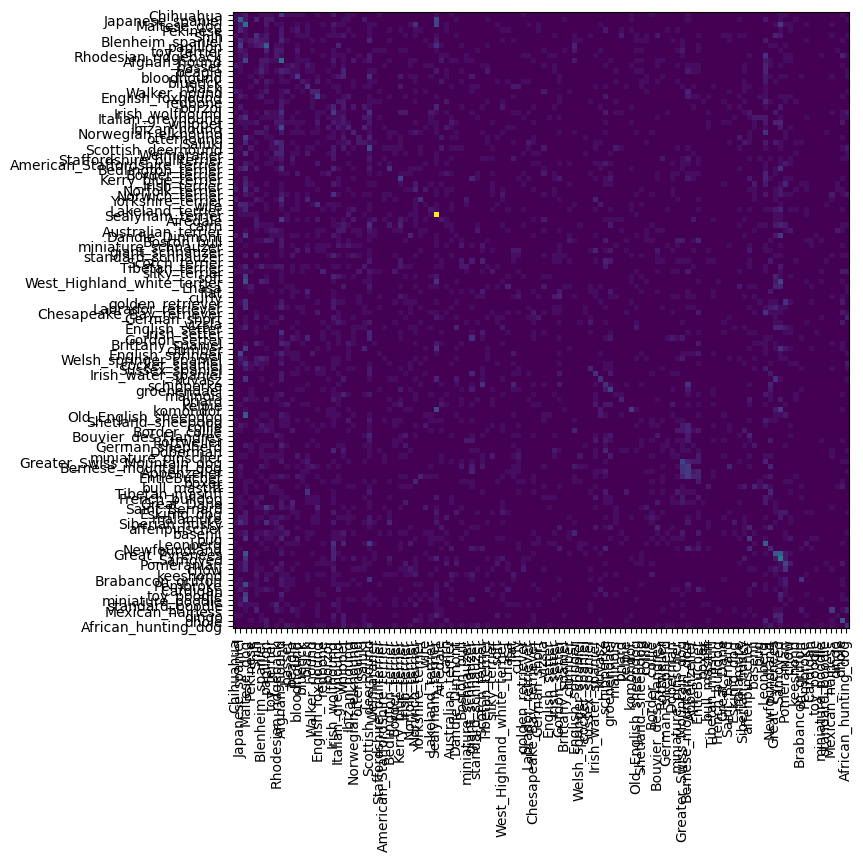

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar
tick_marks = np.arange(len(target_names))
_= plt.xticks(tick_marks, target_names, rotation=90)
_= plt.yticks(tick_marks, target_names)

# Naive Bayes classifier

In [57]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(x_train,y_train)

GaussianNB()

In [59]:
y_pred_nb=nb.predict(x_test)
y_pred_nb

array([ 87,  80, 107, ...,  38,  38,  24], dtype=int64)

In [60]:
accuracy = accuracy_score(y_test,y_pred_nb)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred_nb))

Accuracy: 0.043935926773455376
              precision    recall  f1-score   support

           0       0.01      0.03      0.02        31
           1       0.09      0.23      0.13        40
           2       0.09      0.19      0.12        52
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        46
           5       0.33      0.03      0.05        40
           6       0.12      0.07      0.09        42
           7       0.02      0.29      0.04        35
           8       0.00      0.00      0.00        36
           9       0.40      0.04      0.06        57
          10       0.08      0.03      0.04        37
          11       0.00      0.00      0.00        41
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00        34
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        32
          16       0.67      0.05      0.10       

C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [61]:
# save
joblib.dump(nb, "naive_bayes.joblib")

# load
nb = joblib.load("naive_bayes.joblib")

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [67]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([  8,  84, 107, ...,  16,  20,   2], dtype=int64)

In [68]:
accuracy = accuracy_score(y_test,y_pred_knn)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred_knn))

Accuracy: 0.037070938215102975
              precision    recall  f1-score   support

           0       0.01      0.06      0.02        31
           1       0.04      0.07      0.05        40
           2       0.04      0.33      0.07        52
           3       0.01      0.10      0.02        30
           4       0.02      0.07      0.03        46
           5       0.02      0.03      0.02        40
           6       0.00      0.00      0.00        42
           7       0.05      0.06      0.06        35
           8       0.02      0.08      0.03        36
           9       0.06      0.19      0.09        57
          10       0.00      0.00      0.00        37
          11       0.00      0.00      0.00        41
          12       0.03      0.13      0.05        39
          13       0.04      0.03      0.03        34
          14       0.04      0.10      0.06        31
          15       0.04      0.03      0.04        32
          16       0.09      0.10      0.10       

C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_dtc=dtc.predict(x_test)
y_pred_dtc

array([88, 93, 97, ..., 25, 64,  0], dtype=int64)

In [71]:
accuracy = accuracy_score(y_test,y_pred_dtc)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred_dtc))

Accuracy: 0.022425629290617848
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.07      0.07      0.07        40
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        30
           4       0.02      0.02      0.02        46
           5       0.06      0.07      0.07        40
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        36
           9       0.06      0.09      0.07        57
          10       0.00      0.00      0.00        37
          11       0.03      0.02      0.03        41
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00        34
          14       0.02      0.03      0.03        31
          15       0.03      0.03      0.03        32
          16       0.00      0.00      0.00       

# CNN

In [2]:
#pip install tensorflow

     ---------------------------------------- 0.0/272.8 MB ? eta -:--:--
     --------------------------------------- 1.4/272.8 MB 21.5 MB/s eta 0:00:13
     --------------------------------------- 2.7/272.8 MB 28.5 MB/s eta 0:00:10
      -------------------------------------- 4.5/272.8 MB 31.8 MB/s eta 0:00:09
      -------------------------------------- 6.5/272.8 MB 34.3 MB/s eta 0:00:08
     - ------------------------------------- 8.9/272.8 MB 38.0 MB/s eta 0:00:07
     - ------------------------------------ 11.7/272.8 MB 46.7 MB/s eta 0:00:06
     -- ----------------------------------- 14.7/272.8 MB 54.7 MB/s eta 0:00:05
     -- ----------------------------------- 18.2/272.8 MB 59.5 MB/s eta 0:00:05
     -- ----------------------------------- 20.3/272.8 MB 65.6 MB/s eta 0:00:04
     --- ---------------------------------- 23.2/272.8 MB 65.6 MB/s eta 0:00:04
     --- ---------------------------------- 25.9/272.8 MB 59.5 MB/s eta 0:00:05
     ---- --------------------------------- 29.

In [5]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

In [21]:
num_classes = 120
img_rows, img_cols = 200, 200
batch_size = 16

train_data_dir = '../Data Preprocessing/data/train_test_gray_images_200pixel/train'
validation_data_dir = '../Data Preprocessing/data/train_test_gray_images_200pixel/validate'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows,img_cols), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_rows,img_cols), color_mode="grayscale",  
                                                    batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 17756 images belonging to 120 classes.
Found 4370 images belonging to 120 classes.


In [17]:
model = Sequential()

#Padding = 'same' results in padding the input such that 
# the output has the same length as the original input
model.add(Conv2D(32, (3,3), padding='same', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      320       
                                                                 
 activation_6 (Activation)   (None, 200, 200, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 32)        0         
                                                      

In [25]:
from keras.optimizers import RMSprop, SGD, Adadelta
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [22]:
checkpoint = ModelCheckpoint('cnn_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

#put call backs into callback list
callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

nb_train_sample = 17756
nb_validation_sample = 4370

epochs = 5

histroy = model.fit_generator(train_generator, 
                              steps_per_epoch=nb_train_sample // batch_size,
                             epochs=epochs,
                             callbacks=callbacks,
                             validation_data=validation_generator,
                             validation_steps=nb_validation_sample // batch_size)

Epoch 1/5


C:\Users\gohzh\AppData\Local\Temp\ipykernel_8464\3499662296.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histroy = model.fit_generator(train_generator,


1109/1109 [==============================] - ETA: 0s - loss: 4.8271 - accuracy: 0.0121
Epoch 1: val_loss improved from inf to 4.77633, saving model to cnn_model.h5
1109/1109 [==============================] - 1997s 2s/step - loss: 4.8271 - accuracy: 0.0121 - val_loss: 4.7763 - val_accuracy: 0.0130 - lr: 0.0010
Epoch 2/5
1109/1109 [==============================] - ETA: 0s - loss: 4.7802 - accuracy: 0.0126
Epoch 2: val_loss improved from 4.77633 to 4.77557, saving model to cnn_model.h5
1109/1109 [==============================] - 2217s 2s/step - loss: 4.7802 - accuracy: 0.0126 - val_loss: 4.7756 - val_accuracy: 0.0130 - lr: 0.0010
Epoch 3/5
1109/1109 [==============================] - ETA: 0s - loss: 4.7788 - accuracy: 0.0125
Epoch 3: val_loss improved from 4.77557 to 4.77555, saving model to cnn_model.h5
1109/1109 [==============================] - 1976s 2s/step - loss: 4.7788 - accuracy: 0.0125 - val_loss: 4.7756 - val_accuracy: 0.0130 - lr: 0.0010
Epoch 4/5
1109/1109 [===============

# LeNet

In [6]:
import tensorflow as tf
from keras.optimizers import RMSprop, SGD, Adadelta
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

tf.config.run_functions_eagerly(True)
num_classes = 120
img_rows = 200
img_cols = 200

model = Sequential()

#2 sets of CRP (Convolution, Relu, Pooling)
model.add(Conv2D(20, (5,5), padding='same', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(50, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

#softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 20)      520       
                                                                 
 activation (Activation)     (None, 200, 200, 20)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 50)      25050     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 50)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 50)       0         
 2D)                                                    

In [7]:
print(x_train.shape)
print(x_test.shape)

(17756, 40000)
(4370, 40000)


In [8]:
#training parameters
batch_size = 128
epochs = 100

checkpoint = ModelCheckpoint('lenet_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

#put call backs into callback list
callbacks = [earlystop, checkpoint, reduce_lr]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

histroy = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs,
                             validation_data=(x_test, y_test), shuffle=True, callbacks = callbacks)

#Evaluate the performance of model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
139/139 [==============================] - ETA: 0s - loss: 4.7872 - accuracy: 0.0111
Epoch 1: val_loss improved from inf to 4.78176, saving model to lenet_model.h5
139/139 [==============================] - 916s 7s/step - loss: 4.7872 - accuracy: 0.0111 - val_loss: 4.7818 - val_accuracy: 0.0135 - lr: 0.0010
Epoch 2/100
139/139 [==============================] - ETA: 0s - loss: 4.7776 - accuracy: 0.0132
Epoch 2: val_loss improved from 4.78176 to 4.77534, saving model to lenet_model.h5
139/139 [==============================] - 887s 6s/step - loss: 4.7776 - accuracy: 0.0132 - val_loss: 4.7753 - val_accuracy: 0.0137 - lr: 0.0010
Epoch 3/100
139/139 [==============================] - ETA: 0s - loss: 4.7708 - accuracy: 0.0144
Epoch 3: val_loss improved from 4.77534 to 4.77037, saving model to lenet_model.h5
139/139 [==============================] - 885s 6s/step - loss: 4.7708 - accuracy: 0.0144 - val_loss: 4.7704 - val_accuracy: 0.0160 - lr: 0.0010
Epoch 4/100
139/139 [========

139/139 [==============================] - ETA: 0s - loss: 4.5998 - accuracy: 0.0381
Epoch 26: val_loss improved from 4.64489 to 4.63782, saving model to lenet_model.h5
139/139 [==============================] - 854s 6s/step - loss: 4.5998 - accuracy: 0.0381 - val_loss: 4.6378 - val_accuracy: 0.0359 - lr: 0.0010
Epoch 27/100
139/139 [==============================] - ETA: 0s - loss: 4.5907 - accuracy: 0.0391
Epoch 27: val_loss improved from 4.63782 to 4.63180, saving model to lenet_model.h5
139/139 [==============================] - 853s 6s/step - loss: 4.5907 - accuracy: 0.0391 - val_loss: 4.6318 - val_accuracy: 0.0368 - lr: 0.0010
Epoch 28/100
139/139 [==============================] - ETA: 0s - loss: 4.5816 - accuracy: 0.0400  
Epoch 28: val_loss improved from 4.63180 to 4.62636, saving model to lenet_model.h5
139/139 [==============================] - 18359s 133s/step - loss: 4.5816 - accuracy: 0.0400 - val_loss: 4.6264 - val_accuracy: 0.0355 - lr: 0.0010
Epoch 29/100
139/139 [====

139/139 [==============================] - ETA: 0s - loss: 4.3791 - accuracy: 0.0691
Epoch 51: val_loss improved from 4.53456 to 4.53269, saving model to lenet_model.h5
139/139 [==============================] - 866s 6s/step - loss: 4.3791 - accuracy: 0.0691 - val_loss: 4.5327 - val_accuracy: 0.0460 - lr: 0.0010
Epoch 52/100
139/139 [==============================] - ETA: 0s - loss: 4.3702 - accuracy: 0.0694
Epoch 52: val_loss improved from 4.53269 to 4.52890, saving model to lenet_model.h5
139/139 [==============================] - 878s 6s/step - loss: 4.3702 - accuracy: 0.0694 - val_loss: 4.5289 - val_accuracy: 0.0469 - lr: 0.0010
Epoch 53/100
139/139 [==============================] - ETA: 0s - loss: 4.3620 - accuracy: 0.0721
Epoch 53: val_loss improved from 4.52890 to 4.52772, saving model to lenet_model.h5
139/139 [==============================] - 883s 6s/step - loss: 4.3620 - accuracy: 0.0721 - val_loss: 4.5277 - val_accuracy: 0.0522 - lr: 0.0010
Epoch 54/100
139/139 [==========

Epoch 77/100
139/139 [==============================] - ETA: 0s - loss: 4.1689 - accuracy: 0.0992
Epoch 77: val_loss improved from 4.49882 to 4.49882, saving model to lenet_model.h5

Epoch 77: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
139/139 [==============================] - 862s 6s/step - loss: 4.1689 - accuracy: 0.0992 - val_loss: 4.4988 - val_accuracy: 0.0545 - lr: 0.0010
Epoch 78/100
139/139 [==============================] - ETA: 0s - loss: 4.1472 - accuracy: 0.1045
Epoch 78: val_loss improved from 4.49882 to 4.49458, saving model to lenet_model.h5
139/139 [==============================] - 863s 6s/step - loss: 4.1472 - accuracy: 0.1045 - val_loss: 4.4946 - val_accuracy: 0.0556 - lr: 2.0000e-04
Epoch 79/100
139/139 [==============================] - ETA: 0s - loss: 4.1435 - accuracy: 0.1033
Epoch 79: val_loss improved from 4.49458 to 4.49373, saving model to lenet_model.h5
139/139 [==============================] - 863s 6s/step - loss: 4.1435 - accuracy

# LeNet with Data Argumentation

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

In [2]:
num_classes = 120
img_rows, img_cols = 200, 200
batch_size = 128

train_data_dir = '../Data Preprocessing/data/train_test_gray_images_200pixel/train'
validation_data_dir = '../Data Preprocessing/data/train_test_gray_images_200pixel/validate'

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows,img_cols), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_rows,img_cols), color_mode="grayscale",  
                                                    batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 17756 images belonging to 120 classes.
Found 4370 images belonging to 120 classes.


In [3]:
import tensorflow as tf
from keras.optimizers import RMSprop, SGD, Adadelta
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

tf.config.run_functions_eagerly(True)
num_classes = 120
img_rows = 200
img_cols = 200

model = Sequential()

#2 sets of CRP (Convolution, Relu, Pooling)
model.add(Conv2D(20, (5,5), padding='same', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(50, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

#softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 20)      520       
                                                                 
 activation (Activation)     (None, 200, 200, 20)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 50)      25050     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 50)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 50)       0         
 2D)                                                    

In [4]:
#training parameters
epochs = 100

nb_train_sample = 17756
nb_validation_sample = 4370

checkpoint = ModelCheckpoint('lenet_model_with_data_argumentation.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

#put call backs into callback list
callbacks = [earlystop, checkpoint, reduce_lr]

histroy = model.fit_generator(train_generator, 
                              steps_per_epoch=nb_train_sample // batch_size,
                             epochs=epochs,
                             callbacks=callbacks,
                             validation_data=validation_generator,
                             validation_steps=nb_validation_sample // batch_size)

C:\Users\gohzh\AppData\Local\Temp\ipykernel_10060\2884800180.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histroy = model.fit_generator(train_generator,


Epoch 1/100


C:\Users\gohzh\.conda\envs\facerecognition_flask\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


138/138 [==============================] - ETA: 0s - loss: 4.7877 - accuracy: 0.0079
Epoch 1: val_loss improved from inf to 4.78583, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 896s 6s/step - loss: 4.7877 - accuracy: 0.0079 - val_loss: 4.7858 - val_accuracy: 0.0076 - lr: 0.0010
Epoch 2/100
138/138 [==============================] - ETA: 0s - loss: 4.7860 - accuracy: 0.0087
Epoch 2: val_loss improved from 4.78583 to 4.78369, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 904s 7s/step - loss: 4.7860 - accuracy: 0.0087 - val_loss: 4.7837 - val_accuracy: 0.0106 - lr: 0.0010
Epoch 3/100
138/138 [==============================] - ETA: 0s - loss: 4.7837 - accuracy: 0.0095
Epoch 3: val_loss improved from 4.78369 to 4.78175, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 901s 7s/step - loss: 4.7837 - accuracy: 0.0095 - val_loss: 4.7817 - val

138/138 [==============================] - 868s 6s/step - loss: 4.7620 - accuracy: 0.0138 - val_loss: 4.7536 - val_accuracy: 0.0161 - lr: 0.0010
Epoch 25/100
138/138 [==============================] - ETA: 0s - loss: 4.7612 - accuracy: 0.0147
Epoch 25: val_loss improved from 4.75361 to 4.75218, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 866s 6s/step - loss: 4.7612 - accuracy: 0.0147 - val_loss: 4.7522 - val_accuracy: 0.0156 - lr: 0.0010
Epoch 26/100
138/138 [==============================] - ETA: 0s - loss: 4.7598 - accuracy: 0.0141
Epoch 26: val_loss improved from 4.75218 to 4.75064, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 859s 6s/step - loss: 4.7598 - accuracy: 0.0141 - val_loss: 4.7506 - val_accuracy: 0.0165 - lr: 0.0010
Epoch 27/100
138/138 [==============================] - ETA: 0s - loss: 4.7591 - accuracy: 0.0142
Epoch 27: val_loss improved from 4.75064 to 4.74920, sa

Epoch 48/100
138/138 [==============================] - ETA: 0s - loss: 4.7364 - accuracy: 0.0182
Epoch 48: val_loss improved from 4.71145 to 4.70943, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 881s 6s/step - loss: 4.7364 - accuracy: 0.0182 - val_loss: 4.7094 - val_accuracy: 0.0239 - lr: 0.0010
Epoch 49/100
138/138 [==============================] - ETA: 0s - loss: 4.7350 - accuracy: 0.0189
Epoch 49: val_loss improved from 4.70943 to 4.70720, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 880s 6s/step - loss: 4.7350 - accuracy: 0.0189 - val_loss: 4.7072 - val_accuracy: 0.0244 - lr: 0.0010
Epoch 50/100
138/138 [==============================] - ETA: 0s - loss: 4.7344 - accuracy: 0.0177
Epoch 50: val_loss improved from 4.70720 to 4.70484, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 882s 6s/step - loss: 4.7344 - accuracy: 0.0177 - 

138/138 [==============================] - 883s 6s/step - loss: 4.7083 - accuracy: 0.0205 - val_loss: 4.6613 - val_accuracy: 0.0285 - lr: 0.0010
Epoch 72/100
138/138 [==============================] - ETA: 0s - loss: 4.7086 - accuracy: 0.0204 
Epoch 72: val_loss improved from 4.66133 to 4.65996, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 3952s 29s/step - loss: 4.7086 - accuracy: 0.0204 - val_loss: 4.6600 - val_accuracy: 0.0283 - lr: 0.0010
Epoch 73/100
138/138 [==============================] - ETA: 0s - loss: 4.7043 - accuracy: 0.0216
Epoch 73: val_loss improved from 4.65996 to 4.65754, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 867s 6s/step - loss: 4.7043 - accuracy: 0.0216 - val_loss: 4.6575 - val_accuracy: 0.0283 - lr: 0.0010
Epoch 74/100
138/138 [==============================] - ETA: 0s - loss: 4.7039 - accuracy: 0.0212
Epoch 74: val_loss improved from 4.65754 to 4.65563,

Epoch 95/100
138/138 [==============================] - ETA: 0s - loss: 4.6756 - accuracy: 0.0248
Epoch 95: val_loss improved from 4.61947 to 4.61636, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 890s 6s/step - loss: 4.6756 - accuracy: 0.0248 - val_loss: 4.6164 - val_accuracy: 0.0301 - lr: 0.0010
Epoch 96/100
138/138 [==============================] - ETA: 0s - loss: 4.6744 - accuracy: 0.0253
Epoch 96: val_loss improved from 4.61636 to 4.61431, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 899s 7s/step - loss: 4.6744 - accuracy: 0.0253 - val_loss: 4.6143 - val_accuracy: 0.0312 - lr: 0.0010
Epoch 97/100
138/138 [==============================] - ETA: 0s - loss: 4.6768 - accuracy: 0.0255
Epoch 97: val_loss improved from 4.61431 to 4.61266, saving model to lenet_model_with_data_argumentation.h5
138/138 [==============================] - 899s 7s/step - loss: 4.6768 - accuracy: 0.0255 - 

# Lenet with data argument 2nd round training

In [5]:
num_classes = 120
img_rows, img_cols = 200, 200
batch_size = 64 #reduce batch size

train_data_dir = '../Data Preprocessing/data/train_test_gray_images_200pixel/train'
validation_data_dir = '../Data Preprocessing/data/train_test_gray_images_200pixel/validate'

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows,img_cols), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_rows,img_cols), color_mode="grayscale",  
                                                    batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 17756 images belonging to 120 classes.
Found 4370 images belonging to 120 classes.


In [ ]:
#training parameters
epochs = 100

nb_train_sample = 17756
nb_validation_sample = 4370

checkpoint = ModelCheckpoint('lenet_model_with_data_argumentation_round2.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0002) #change learning rate

#put call backs into callback list
callbacks = [earlystop, checkpoint, reduce_lr]

histroy = model.fit_generator(train_generator, 
                              steps_per_epoch=nb_train_sample // batch_size,
                             epochs=epochs,
                             callbacks=callbacks,
                             validation_data=validation_generator,
                             validation_steps=nb_validation_sample // batch_size)

C:\Users\gohzh\AppData\Local\Temp\ipykernel_10060\1969146420.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histroy = model.fit_generator(train_generator,


Epoch 1/100
277/277 [==============================] - ETA: 0s - loss: 4.6718 - accuracy: 0.0255
Epoch 1: val_loss improved from inf to 4.60521, saving model to lenet_model_with_data_argumentation_round2.h5
277/277 [==============================] - 961s 3s/step - loss: 4.6718 - accuracy: 0.0255 - val_loss: 4.6052 - val_accuracy: 0.0317 - lr: 0.0010
Epoch 2/100
277/277 [==============================] - ETA: 0s - loss: 4.6700 - accuracy: 0.0258
Epoch 2: val_loss improved from 4.60521 to 4.60196, saving model to lenet_model_with_data_argumentation_round2.h5
277/277 [==============================] - 944s 3s/step - loss: 4.6700 - accuracy: 0.0258 - val_loss: 4.6020 - val_accuracy: 0.0315 - lr: 0.0010
Epoch 3/100
277/277 [==============================] - ETA: 0s - loss: 4.6649 - accuracy: 0.0266
Epoch 3: val_loss improved from 4.60196 to 4.59836, saving model to lenet_model_with_data_argumentation_round2.h5
277/277 [==============================] - 928s 3s/step - loss: 4.6649 - accuracy

# AlexNet

In [5]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2

In [6]:
l2_reg = 0

num_classes = 120
img_rows = 200
img_cols = 200

# Initialize model
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(96, (11,11), input_shape=(img_rows, img_cols, 1), padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Conv Layer
model.add(Conv2D(256, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Conv Layer
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Conv Layer
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Conv Layer
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 1st FC Layer
model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4069))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3rd FC Layer
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 96)      11712     
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 96)     384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 200, 200, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 96)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 256)     614656    
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 256)    1

In [7]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)

(17756, 200, 200, 1)
(4370, 200, 200, 1)


In [ ]:
batch_size = 32
epochs = 1

histroy = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs,
                             validation_data=(x_test, y_test), shuffle=True)

model.save('alexnet_model.h5')

#Evaluate the performance of model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

  6/555 [..............................] - ETA: 22:10:32 - loss: 5.3345 - accuracy: 0.0000e+00